In [52]:
import pandas as pd 

df = pd.read_csv("watson_healthcare_modified.csv")

In [3]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns

In [5]:
from collections import Counter

print(dict(Counter(df['Attrition'])))

{'No': 1477, 'Yes': 199}


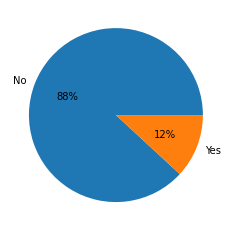

In [11]:
import matplotlib.pyplot as plt

keys = ['No', 'Yes']
data = [1477, 199]

plt.pie(data, labels = keys, autopct='%.0f%%')
plt.show()

In [12]:
def get_pie_chart(df_in, categorical_column, categorical_value):
        df_category = df_in[df_in[categorical_column] == categorical_value].copy()
        attrition_dict = dict(Counter(df_category['Attrition']))

        keys = list(attrition_dict.keys())
        data = list(attrition_dict.values())

        plt.pie(data, labels = keys, autopct='%.0f%%')
        plt.title(f"Attrition for {categorical_value}")
        plt.show()

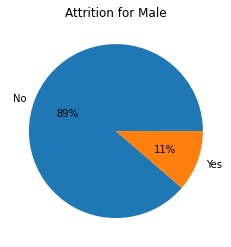

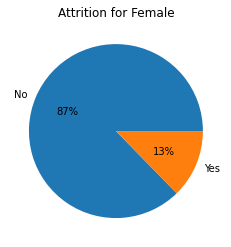

In [14]:
get_pie_chart(df, 'Gender', 'Male')
get_pie_chart(df, 'Gender', 'Female')

In [16]:
import seaborn as sns 
def get_attrition_box_plot(df_in, numerical_column):
    sns.boxplot(x= df_in['Attrition'], y = df_in[numerical_column])
    plt.show()

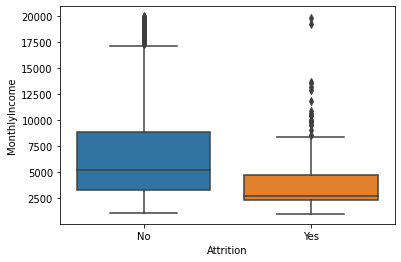

In [18]:
get_attrition_box_plot(df, 'MonthlyIncome')

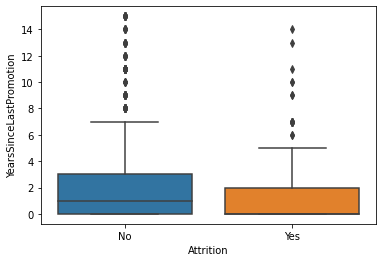

In [20]:
get_attrition_box_plot(df, 'YearsSinceLastPromotion')

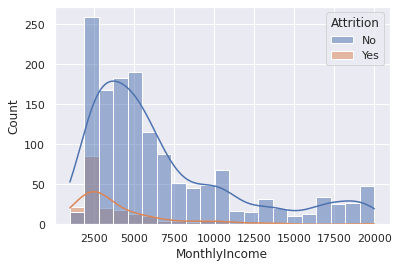

In [22]:

sns.histplot(data=df, x="MonthlyIncome", hue="Attrition", kde=True)

sns.set()


In [53]:
X = df[['MonthlyIncome', 'Gender', 'YearsSinceLastPromotion', 'JobRole']]
df['Attrition_Target'] = np.where(df['Attrition'] == 'Yes', 1, 0)
y= df['Attrition_Target']
print(Counter(y))

Counter({0: 1477, 1: 199})


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
%pip install -U catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 12.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [66]:
from catboost import CatBoostClassifier
categorical_list = ['Gender', 'JobRole']

model = CatBoostClassifier(cat_features = categorical_list, verbose=True, loss_function='Logloss', iterations=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Learning rate set to 0.410493
0:	learn: 0.4981984	total: 1.01ms	remaining: 19.2ms
1:	learn: 0.4040447	total: 2.05ms	remaining: 18.5ms
2:	learn: 0.3545146	total: 3.74ms	remaining: 21.2ms
3:	learn: 0.3321976	total: 4.59ms	remaining: 18.4ms
4:	learn: 0.3157211	total: 6.05ms	remaining: 18.1ms
5:	learn: 0.3044615	total: 7.49ms	remaining: 17.5ms
6:	learn: 0.2975161	total: 8.99ms	remaining: 16.7ms
7:	learn: 0.2890186	total: 10.9ms	remaining: 16.4ms
8:	learn: 0.2832910	total: 12.4ms	remaining: 15.1ms
9:	learn: 0.2815588	total: 13.5ms	remaining: 13.5ms
10:	learn: 0.2808527	total: 14.6ms	remaining: 11.9ms
11:	learn: 0.2790477	total: 16.1ms	remaining: 10.7ms
12:	learn: 0.2776149	total: 17.2ms	remaining: 9.24ms
13:	learn: 0.2765885	total: 22.5ms	remaining: 9.65ms
14:	learn: 0.2754984	total: 23.6ms	remaining: 7.86ms
15:	learn: 0.2740212	total: 24.5ms	remaining: 6.13ms
16:	learn: 0.2724692	total: 26.2ms	remaining: 4.63ms
17:	learn: 0.2722996	total: 26.9ms	remaining: 2.99ms
18:	learn: 0.2720837	total

In [68]:
from sklearn.metrics import average_precision_score
avg_precision = average_precision_score(y_test, y_pred)
print("Average Precision: ", avg_precision)

Average Precision:  0.1482728975800036


In [71]:
df_yes = df[df['Attrition']=='Yes'].copy()
df_no = df[df['Attrition']=='No'].copy()
df_no = df_no.sample(len(df_yes), random_state=42)
df_down_sample = df_yes.append(df_no)
df_down_sample = df_down_sample.sample(frac=1)

X = df_down_sample[['MonthlyIncome', 'Gender', 'YearsSinceLastPromotion', 'JobRole']]
df_down_sample['Attrition_Target'] = np.where(df_down_sample['Attrition'] == 'Yes', 1, 0)
y= df_down_sample['Attrition_Target']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

categorical_list = ['Gender', 'JobRole']

model_down_sample = CatBoostClassifier(cat_features = categorical_list, verbose=True, loss_function='Logloss', iterations=20)
model_down_sample.fit(X_train, y_train)
y_pred = model_down_sample.predict(X_test)

Learning rate set to 0.222014
0:	learn: 0.6657715	total: 1.07ms	remaining: 20.4ms
1:	learn: 0.6436748	total: 3.07ms	remaining: 27.7ms
2:	learn: 0.6284590	total: 3.77ms	remaining: 21.4ms
3:	learn: 0.6153192	total: 4.42ms	remaining: 17.7ms
4:	learn: 0.6038252	total: 5.08ms	remaining: 15.2ms
5:	learn: 0.5945517	total: 5.77ms	remaining: 13.5ms
6:	learn: 0.5876709	total: 6.39ms	remaining: 11.9ms
7:	learn: 0.5827853	total: 7.01ms	remaining: 10.5ms
8:	learn: 0.5789697	total: 7.63ms	remaining: 9.33ms
9:	learn: 0.5751293	total: 8.25ms	remaining: 8.25ms
10:	learn: 0.5694053	total: 8.9ms	remaining: 7.28ms
11:	learn: 0.5636427	total: 9.52ms	remaining: 6.35ms
12:	learn: 0.5594688	total: 10.2ms	remaining: 5.51ms
13:	learn: 0.5576110	total: 10.8ms	remaining: 4.65ms
14:	learn: 0.5529231	total: 11.6ms	remaining: 3.86ms
15:	learn: 0.5499456	total: 12.2ms	remaining: 3.05ms
16:	learn: 0.5483616	total: 12.9ms	remaining: 2.27ms
17:	learn: 0.5444002	total: 13.5ms	remaining: 1.5ms
18:	learn: 0.5421032	total: 

In [73]:
from sklearn.metrics import average_precision_score
avg_precision = average_precision_score(y_test, y_pred)
print("Average Precision: ", avg_precision)

Average Precision:  0.6273404255319148


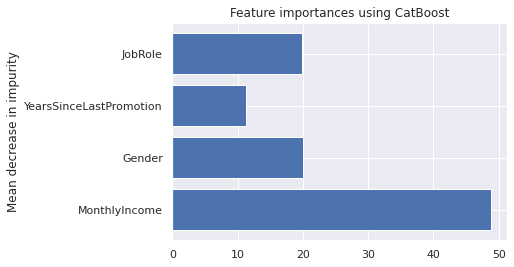

In [79]:
importances = model_down_sample.feature_importances_
feature_names = model_down_sample.feature_names_

forest_importances = pd.Series(importances, index=feature_names)

plt.barh(feature_names, importances)
plt.title("Feature importances using CatBoost")
plt.ylabel("Mean decrease in impurity")
fig.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=032b66c9-0205-4909-8666-ae756feef0d4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>